<a href="https://colab.research.google.com/github/laxmi-priya/Natural_language_processing/blob/main/gensim_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gensim.downloader as api
wv = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


# gensim overview

In [7]:
wv.similarity(w1='banana',w2='banana')#computing the similarity between two words

1.0000001

In [ ]:
dir(wv)

In [9]:
wv.most_similar('happy')#Finding most similar words

[('glad', 0.742780864238739),
 ("'m", 0.7389225363731384),
 ('always', 0.7260880470275879),
 ('really', 0.7217552661895752),
 ('everyone', 0.7178582549095154),
 ('pleased', 0.7057918310165405),
 ('wish', 0.7009027600288391),
 ('everybody', 0.6989898681640625),
 ('good', 0.6944485902786255),
 ('feel', 0.6898111701011658)]

In [10]:
wv.most_similar(positive=['king','woman'],negative=['man'])

[('queen', 0.6978678107261658),
 ('princess', 0.6081745028495789),
 ('monarch', 0.5889754891395569),
 ('throne', 0.5775108933448792),
 ('prince', 0.5750998258590698),
 ('elizabeth', 0.5463595986366272),
 ('daughter', 0.5399126410484314),
 ('kingdom', 0.5318052768707275),
 ('mother', 0.5168544054031372),
 ('crown', 0.5164473056793213)]

In [11]:
wv.doesnt_match(["book","pen","burger"])

'burger'

# Text classification (Fake and Real news classificatin)

In [12]:
import pandas as pd
df = pd.read_csv("https://github.com/codebasics/nlp-tutorials/raw/main/16_word_vectors_gensim_text_classification/fake_and_real_news.csv")
df.head

<bound method NDFrame.head of                                                    Text label
0      Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1     U.S. conservative leader optimistic of common ...  Real
2     Trump proposes U.S. tax overhaul, stirs concer...  Real
3      Court Forces Ohio To Allow Millions Of Illega...  Fake
4     Democrats say Trump agrees to work on immigrat...  Real
...                                                 ...   ...
9895   Wikileaks Admits To Screwing Up IMMENSELY Wit...  Fake
9896  Trump consults Republican senators on Fed chie...  Real
9897  Trump lawyers say judge lacks jurisdiction for...  Real
9898   WATCH: Right-Wing Pastor Falsely Credits Trum...  Fake
9899   Sean Spicer HILARIOUSLY Branded As Chickensh*...  Fake

[9900 rows x 2 columns]>

In [13]:
df['label_num'] = df['label'].map({
    'Fake':0,
    'Real':1
})
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [14]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [15]:
def preprocess_and_vectorization(text):
  doc = nlp(text)
  filtered_text=[]
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_text.append(token.lemma_)
  return wv.get_mean_vector(filtered_text)

In [16]:
df['vector'] = df['Text'].apply(lambda x: preprocess_and_vectorization(x))
df.head

<bound method NDFrame.head of                                                    Text label  label_num  \
0      Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake          0   
1     U.S. conservative leader optimistic of common ...  Real          1   
2     Trump proposes U.S. tax overhaul, stirs concer...  Real          1   
3      Court Forces Ohio To Allow Millions Of Illega...  Fake          0   
4     Democrats say Trump agrees to work on immigrat...  Real          1   
...                                                 ...   ...        ...   
9895   Wikileaks Admits To Screwing Up IMMENSELY Wit...  Fake          0   
9896  Trump consults Republican senators on Fed chie...  Real          1   
9897  Trump lawyers say judge lacks jurisdiction for...  Real          1   
9898   WATCH: Right-Wing Pastor Falsely Credits Trum...  Fake          0   
9899   Sean Spicer HILARIOUSLY Branded As Chickensh*...  Fake          0   

                                                 vector  

In [19]:
df.sample()[:2]

,Text,label,label_num,vector
2364,Trump says Senate should have passed healthcar...,Real,1,"[-0.009104803, 0.026413655, -0.017961456, -0.0..."


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [21]:
import numpy as np
X_train_2D = np.stack(X_train)
X_test_2D = np.stack(X_test)

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()
clf.fit(X_train_2D,Y_train)
Y_pred = clf.predict(X_test_2D)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1024
           1       0.97      0.98      0.97       956

    accuracy                           0.97      1980
   macro avg       0.97      0.97      0.97      1980
weighted avg       0.97      0.97      0.97      1980



Ploting confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm



array([[996,  28],
       [ 23, 933]])

Text(95.72222222222221, 0.5, 'Truth')

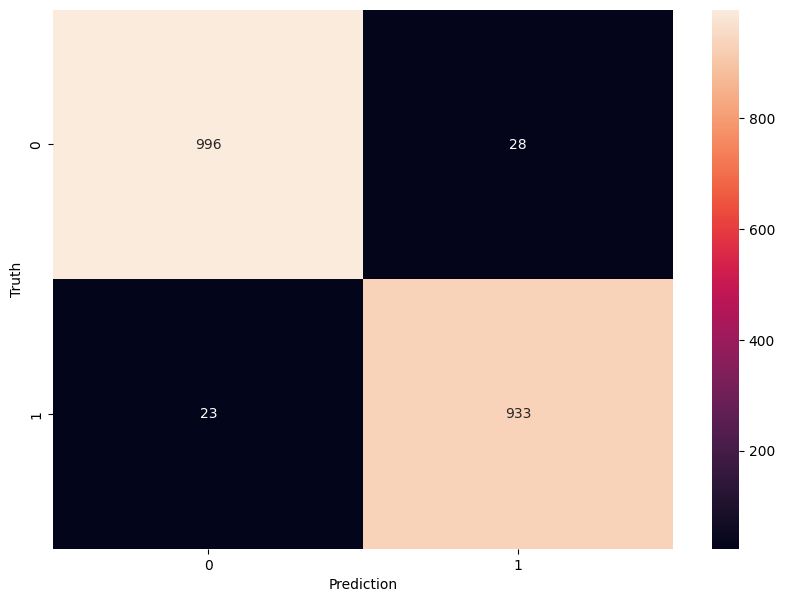

In [25]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')